## Importing the Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import plotly.graph_objs as go
import seaborn as sns
sns.set()

## Loading Data

In [2]:
raw_data = pd.read_csv('1.04 STATION SANDWIP.csv')
raw_data.head()

YEAR  MONTH  DAY  SURFACE PRESSURE  DEW POINT  TEMPERATURE  PRECIPITATION  \
0  2017      1    1            101.54      16.69        23.98           0.00   
1  2017      1    2            101.53      16.66        24.37           0.01   
2  2017      1    3            101.42      16.32        24.60           0.01   
3  2017      1    4            101.34      17.26        24.09           0.01   
4  2017      1    5            101.31      16.33        24.08           0.01   

   MAX WIND SPD  RELATIVE HUMIDITY  MIN TEMP  N_ICE EXTENT  S_ICE EXTENT  \
0          1.88              76.25     17.96        12.643         5.516   
1          1.62              76.88     17.60        12.644         5.387   
2          2.38              75.31     17.16        12.713         5.232   
3          3.11              80.94     17.37        12.954         5.149   
4          3.69              78.94     16.62        12.956         5.065   

    HIGH    LOW  
0  0.906 -2.184  
1  0.846 -2.124  
2  0.766 -2.064  
3  0.716 -1.984  
4  0.666 -1.884

## Handling Null Values

In [3]:
raw_data.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
SURFACE PRESSURE     0
DEW POINT            0
TEMPERATURE          0
PRECIPITATION        0
MAX WIND SPD         0
RELATIVE HUMIDITY    0
MIN TEMP             0
N_ICE EXTENT         0
S_ICE EXTENT         0
HIGH                 1
LOW                  0
dtype: int64

In [4]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

YEAR        MONTH          DAY  SURFACE PRESSURE    DEW POINT  \
count  1460.000000  1460.000000  1460.000000       1460.000000  1460.000000   
mean   2018.501370     6.522603    15.738356        100.860027    22.241712   
std       1.119029     3.451044     8.799809          0.536813     4.690582   
min    2017.000000     1.000000     1.000000         99.210000     9.330000   
25%    2017.750000     4.000000     8.000000        100.427500    18.345000   
50%    2019.000000     7.000000    16.000000        100.910000    24.180000   
75%    2020.000000    10.000000    23.000000        101.310000    26.230000   
max    2020.000000    12.000000    31.000000        101.920000    27.940000   

       TEMPERATURE  PRECIPITATION  MAX WIND SPD  RELATIVE HUMIDITY  \
count  1460.000000    1460.000000   1460.000000        1460.000000   
mean     27.980596      15.630034      3.201616          80.033596   
std       2.866740      31.301240      2.319251           8.116805   
min      19.450000       0.000000      0.040000          48.940000   
25%      26.205000       0.000000      1.340000          74.310000   
50%      29.145000       2.935000      2.770000          82.380000   
75%      29.930000      18.090000      4.612500          86.560000   
max      33.500000     389.670000     11.000000          93.000000   

          MIN TEMP  N_ICE EXTENT  S_ICE EXTENT         HIGH          LOW  
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  
mean     24.223068     10.275003     11.054688     1.878397    -1.925562  
std       4.565971      3.527786      5.801186     0.941878     1.339417  
min      11.830000      3.793000      2.080000    -3.514000    -3.514000  
25%      20.852500      6.828750      5.163250     1.226000    -2.884000  
50%      26.440000     11.158000     11.883000     1.748000    -2.644000  
75%      27.900000     13.462750     16.883000     2.386000    -1.684000  
max      29.410000     15.071000     19.062000     4.800000     1.180000

## Distribution Check and Dealing With Outliers

In [5]:
df = data_no_mv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


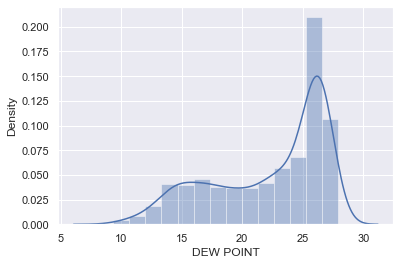

In [6]:
sns.distplot(df['DEW POINT'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


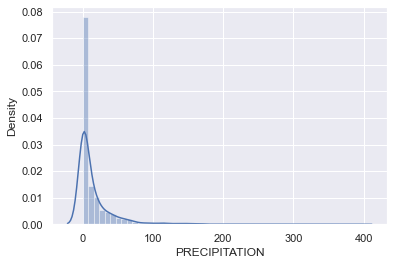

In [7]:
sns.distplot(df['PRECIPITATION'])
plt.show()

In [8]:
#q = df['PRECIPITATION'].quantile(0.99)
#data_1 = df[df['PRECIPITATION']<q]
#sns.distplot(data_1['PRECIPITATION'])
#plt.show()

In [9]:
#data_cleaned = data_1.reset_index(drop=True)
data_cleaned = df.reset_index(drop=True)

In [10]:
data_cleaned = data_cleaned.drop(['HIGH'],axis=1)
data_cleaned.describe(include='all')

YEAR        MONTH          DAY  SURFACE PRESSURE    DEW POINT  \
count  1460.000000  1460.000000  1460.000000       1460.000000  1460.000000   
mean   2018.501370     6.522603    15.738356        100.860027    22.241712   
std       1.119029     3.451044     8.799809          0.536813     4.690582   
min    2017.000000     1.000000     1.000000         99.210000     9.330000   
25%    2017.750000     4.000000     8.000000        100.427500    18.345000   
50%    2019.000000     7.000000    16.000000        100.910000    24.180000   
75%    2020.000000    10.000000    23.000000        101.310000    26.230000   
max    2020.000000    12.000000    31.000000        101.920000    27.940000   

       TEMPERATURE  PRECIPITATION  MAX WIND SPD  RELATIVE HUMIDITY  \
count  1460.000000    1460.000000   1460.000000        1460.000000   
mean     27.980596      15.630034      3.201616          80.033596   
std       2.866740      31.301240      2.319251           8.116805   
min      19.450000       0.000000      0.040000          48.940000   
25%      26.205000       0.000000      1.340000          74.310000   
50%      29.145000       2.935000      2.770000          82.380000   
75%      29.930000      18.090000      4.612500          86.560000   
max      33.500000     389.670000     11.000000          93.000000   

          MIN TEMP  N_ICE EXTENT  S_ICE EXTENT          LOW  
count  1460.000000   1460.000000   1460.000000  1460.000000  
mean     24.223068     10.275003     11.054688    -1.925562  
std       4.565971      3.527786      5.801186     1.339417  
min      11.830000      3.793000      2.080000    -3.514000  
25%      20.852500      6.828750      5.163250    -2.884000  
50%      26.440000     11.158000     11.883000    -2.644000  
75%      27.900000     13.462750     16.883000    -1.684000  
max      29.410000     15.071000     19.062000     1.180000

In [11]:
data_cleaned.corr()['LOW']

YEAR                 0.491460
MONTH               -0.177820
DAY                  0.005222
SURFACE PRESSURE    -0.147024
DEW POINT            0.154708
TEMPERATURE          0.129985
PRECIPITATION        0.026029
MAX WIND SPD         0.065894
RELATIVE HUMIDITY    0.129106
MIN TEMP             0.145301
N_ICE EXTENT        -0.043460
S_ICE EXTENT         0.020510
LOW                  1.000000
Name: LOW, dtype: float64

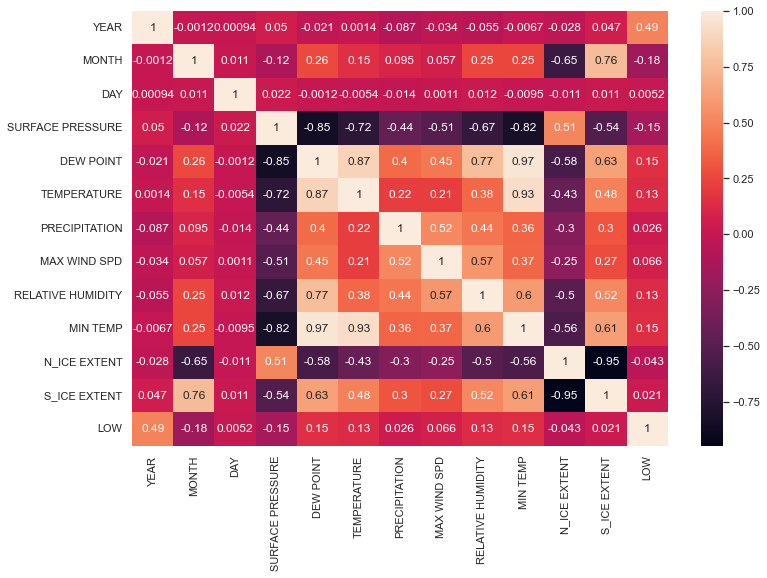

In [12]:
fig_dims = (12,8)
fig,ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data_cleaned.corr(), ax=ax,annot=True)
plt.show()

In [13]:
#data_cleaned = data_cleaned.drop(['DEW POINT'],axis=1)
data_cleaned = data_cleaned.drop(['SURFACE PRESSURE'],axis=1)
data_cleaned = data_cleaned.drop(['MIN TEMP'],axis=1)
data_cleaned = data_cleaned.drop(['N_ICE EXTENT'],axis=1)
#data_cleaned = data_cleaned.drop(['Total_ICE EXTENT'],axis=1)
data_cleaned = data_cleaned.drop(['TEMPERATURE'],axis=1)
#data_cleaned = data_cleaned.drop(['RELATIVE HUMIDITY'],axis=1)
data_cleaned.describe(include='all')

YEAR        MONTH          DAY    DEW POINT  PRECIPITATION  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   2018.501370     6.522603    15.738356    22.241712      15.630034   
std       1.119029     3.451044     8.799809     4.690582      31.301240   
min    2017.000000     1.000000     1.000000     9.330000       0.000000   
25%    2017.750000     4.000000     8.000000    18.345000       0.000000   
50%    2019.000000     7.000000    16.000000    24.180000       2.935000   
75%    2020.000000    10.000000    23.000000    26.230000      18.090000   
max    2020.000000    12.000000    31.000000    27.940000     389.670000   

       MAX WIND SPD  RELATIVE HUMIDITY  S_ICE EXTENT          LOW  
count   1460.000000        1460.000000   1460.000000  1460.000000  
mean       3.201616          80.033596     11.054688    -1.925562  
std        2.319251           8.116805      5.801186     1.339417  
min        0.040000          48.940000      2.080000    -3.514000  
25%        1.340000          74.310000      5.163250    -2.884000  
50%        2.770000          82.380000     11.883000    -2.644000  
75%        4.612500          86.560000     16.883000    -1.684000  
max       11.000000          93.000000     19.062000     1.180000

In [14]:
data_cleaned.describe(include='all')

YEAR        MONTH          DAY    DEW POINT  PRECIPITATION  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   2018.501370     6.522603    15.738356    22.241712      15.630034   
std       1.119029     3.451044     8.799809     4.690582      31.301240   
min    2017.000000     1.000000     1.000000     9.330000       0.000000   
25%    2017.750000     4.000000     8.000000    18.345000       0.000000   
50%    2019.000000     7.000000    16.000000    24.180000       2.935000   
75%    2020.000000    10.000000    23.000000    26.230000      18.090000   
max    2020.000000    12.000000    31.000000    27.940000     389.670000   

       MAX WIND SPD  RELATIVE HUMIDITY  S_ICE EXTENT          LOW  
count   1460.000000        1460.000000   1460.000000  1460.000000  
mean       3.201616          80.033596     11.054688    -1.925562  
std        2.319251           8.116805      5.801186     1.339417  
min        0.040000          48.940000      2.080000    -3.514000  
25%        1.340000          74.310000      5.163250    -2.884000  
50%        2.770000          82.380000     11.883000    -2.644000  
75%        4.612500          86.560000     16.883000    -1.684000  
max       11.000000          93.000000     19.062000     1.180000

## Neural Network Regression

### Train-Test Split

In [15]:
dataset = data_cleaned
train_dataset = dataset.sample(frac=0.8,random_state=22)
test_dataset = dataset.drop(train_dataset.index)

#### Separate the target value, or “label”, from the features. This label is the value that we will train the model to predict.

In [16]:
train_labels = train_dataset.pop('LOW')
test_labels = test_dataset.pop('LOW')

### Scaling the Input Data

In [17]:
scaler=MinMaxScaler()
scaler.fit(train_dataset)
normed_train_data = scaler.transform(train_dataset)
scaler.fit(test_dataset)
normed_test_data = scaler.transform(test_dataset)

### Model

In [18]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.tanh, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.tanh),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  #optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [19]:
NN_model = build_model()
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


### Training

In [20]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2500

history = NN_model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  mean_absolute_error  mean_squared_error  val_loss  \
2495  0.006222             0.055990            0.006222  0.021800   
2496  0.005799             0.052042            0.005799  0.020013   
2497  0.006760             0.055603            0.006760  0.022825   
2498  0.005754             0.053581            0.005754  0.018160   
2499  0.005913             0.052470            0.005913  0.023709   

      val_mean_absolute_error  val_mean_squared_error  epoch  
2495                 0.107408                0.021800   2495  
2496                 0.105846                0.020013   2496  
2497                 0.110318                0.022825   2497  
2498                 0.101811                0.018160   2498  
2499                 0.117168                0.023709   2499

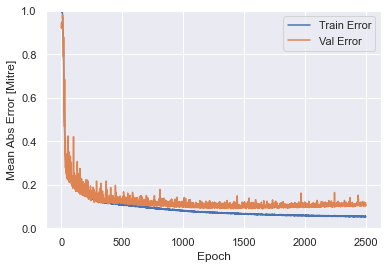

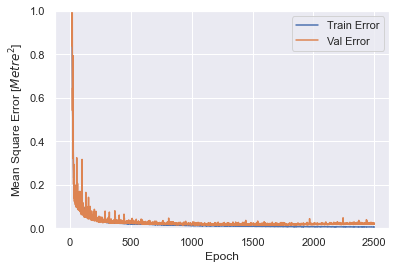

In [22]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Mitre]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Metre^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)


.....................................................................................

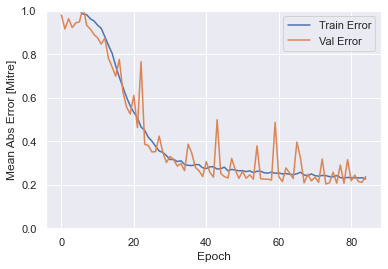

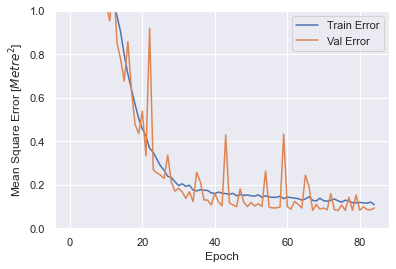

In [23]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                   validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

### Testing

In [24]:
loss, mae, mse = NN_model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} M".format(mae))

Testing set Mean Abs Error:  0.12 M


In [25]:
y_pred_NN = NN_model.predict(normed_test_data)
Test_score_NN =r2_score(test_labels,y_pred_NN)
print("Testing Score: ",Test_score_NN)

Testing Score:  0.9867333128507907


### Visulizing Predictions

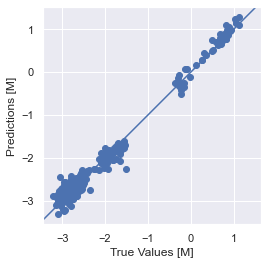

In [26]:
y_pred_NN = NN_model.predict(normed_test_data).flatten()

plt.scatter(test_labels, y_pred_NN)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()

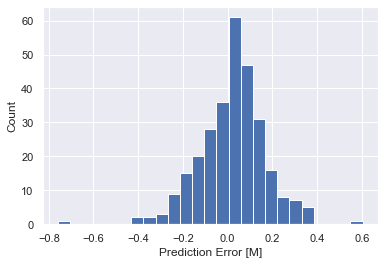

In [27]:
error = y_pred_NN - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [M]")
_ = plt.ylabel("Count")
plt.show()

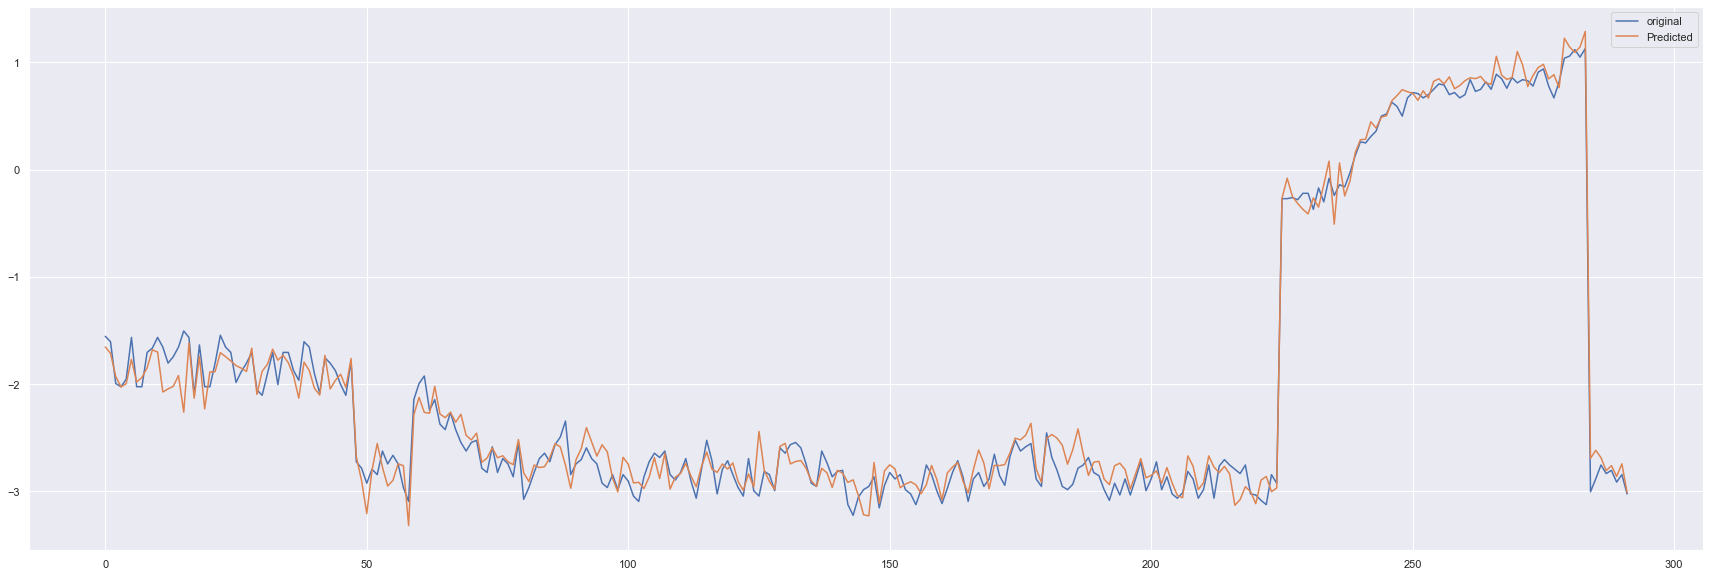

In [28]:
x_ax = range(len(test_labels))
plt.figure(figsize=(30,10))
plt.plot(x_ax, test_labels,label="original")
plt.plot(x_ax, y_pred_NN, label="Predicted")
plt.legend()
plt.show()

In [29]:
data_wmv = raw_data[raw_data.isnull().any(axis=1)]
data_wmv.head()

YEAR  MONTH  DAY  SURFACE PRESSURE  DEW POINT  TEMPERATURE  \
548  2018      7    3            100.14      26.72         28.9   

     PRECIPITATION  MAX WIND SPD  RELATIVE HUMIDITY  MIN TEMP  N_ICE EXTENT  \
548         168.75          7.98              90.88     27.86         9.633   

     S_ICE EXTENT  HIGH    LOW  
548        14.744   NaN -2.584